# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
DATASET_PATH = "./data/heart_disease/"

In [3]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

In [4]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv')
my_cols

,column,descriptions
0,age,age in years
1,sex,sex (1 = male; 0 = female)
2,cp,chest pain type Value 1: typical angina Value ...
3,trestbps,resting blood pressure (in mm Hg on admission ...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; ...
6,restecg,resting electrocardiographic results Value 0: ...
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to ...


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [5]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [7]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [8]:
y = my_data[target].values

In [9]:
sano_mask = y == 0
enfermo_mask = y > 0

In [10]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [11]:
y_class

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [12]:
pd.get_dummies(my_data[categorical_features])

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,0.0,0.0,0.0,2.0,True,False,False,False,False,False,False,True,False
298,1.0,4.0,1.0,0.0,0.0,2.0,False,False,True,False,False,False,False,True,False
299,1.0,4.0,0.0,0.0,1.0,2.0,False,True,False,False,False,False,False,True,False
300,0.0,2.0,0.0,2.0,0.0,2.0,False,True,False,False,False,True,False,False,False


In [13]:
pca = PCA(n_components=0.9).fit(my_data[numerical_features])

pca.n_components_

2

In [14]:
X_transformed = pca.transform(my_data[numerical_features])

In [15]:
X_transformed

array([[ 4.15197276e+01,  6.04359951e+01],
       [-1.75994017e+01,  3.01920764e+01],
       [ 2.12973462e+00, -5.45861630e+01],
       [-4.34743454e+01, -3.24753433e+01],
       [-1.15270317e+01, -3.99676683e+01],
       [ 2.18359694e+01, -1.36251712e+01],
       [ 1.06416100e+02, -2.03988377e+01],
       [ 7.52203752e+00,  4.50457172e+00],
       [-4.33295298e+01, -6.79174957e+00],
       [-5.40858010e+01,  3.61377300e+00],
       [ 4.76163183e+01, -4.88514137e+00],
       [ 9.29523476e+00,  1.06638337e+01],
       [ 1.50008069e+01, -3.47313944e+01],
       [-4.58080508e+01, -1.54606005e+01],
       [-7.77844491e+01, -3.21393208e+01],
       [-1.92309131e+01, -2.71659586e+01],
       [-7.41691526e+00, -1.42000964e+01],
       [ 2.79752555e+01,  1.36751141e+01],
       [ 1.87164266e+01, -3.09825000e+01],
       [-3.63354231e+01,  8.63630131e+00],
       [ 3.71347167e+01, -1.67444313e+01],
       [ 3.66305869e+01, -1.51122588e+01],
       [-2.27632860e+01, -3.20576672e+01],
       [-4.

/home/octadesh/POSTGRADO_IA/inteligencia_artificial/intro_ia_fiuba/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/octadesh/POSTGRADO_IA/inteligencia_artificial/intro_ia_fiuba/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/octadesh/POSTGRADO_IA/inteligencia_artificial/intro_ia_fiuba/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/octadesh/POSTGRADO_IA/inteligencia_artificial/int

<Axes: >

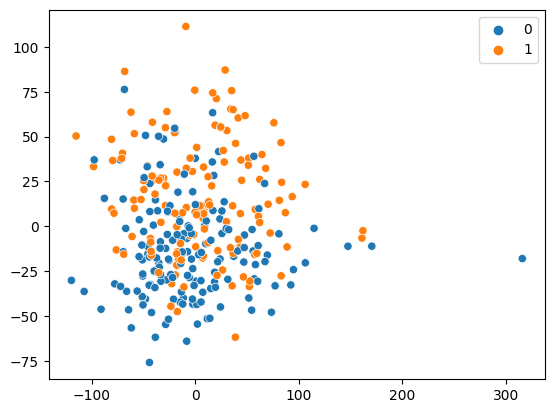

In [16]:
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1], hue=y_class)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [17]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import preprocessing
import seaborn as sns

In [18]:
#Armado del dataset: 

cat_data = pd.get_dummies(my_data[categorical_features])
num_data = my_data[numerical_features]

df = num_data.merge(cat_data, left_index=True, right_index=True).astype(float)

results_df = {"model": [], "recall": [], "precision":[], "accuracy": []}

In [19]:
X = df.values[:, :-1]
y = y_class

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy score for Logistic Regression: 0.8524590163934426
Recall for Logistic Regression: 0.8571428571428571
Precision for Logistic Regression: 0.8275862068965517


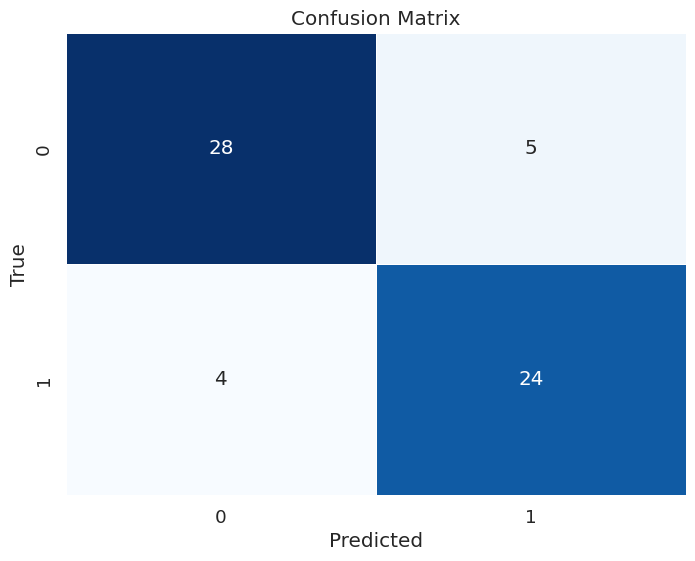

In [20]:
#Train LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

#Calculate metrics in tranning
y_test_pred = model.predict(X_test)

acc = accuracy_score(y_test_pred, y_test)
precision = precision_score(y_test_pred, y_test)
recall = recall_score(y_test_pred, y_test)
confusion = confusion_matrix(y_test_pred, y_test)

print(f"Accuracy score for Logistic Regression: {acc}")
print(f"Recall for Logistic Regression: {recall}")
print(f"Precision for Logistic Regression: {precision}")

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

results_df["model"].append("Linear Regression")
results_df["recall"].append(recall)
results_df["precision"].append(precision)
results_df["accuracy"].append(acc)

Accuracy score for Logistic Regression: 0.8524590163934426
Recall for Logistic Regression: 0.8846153846153846
Precision for Logistic Regression: 0.7931034482758621


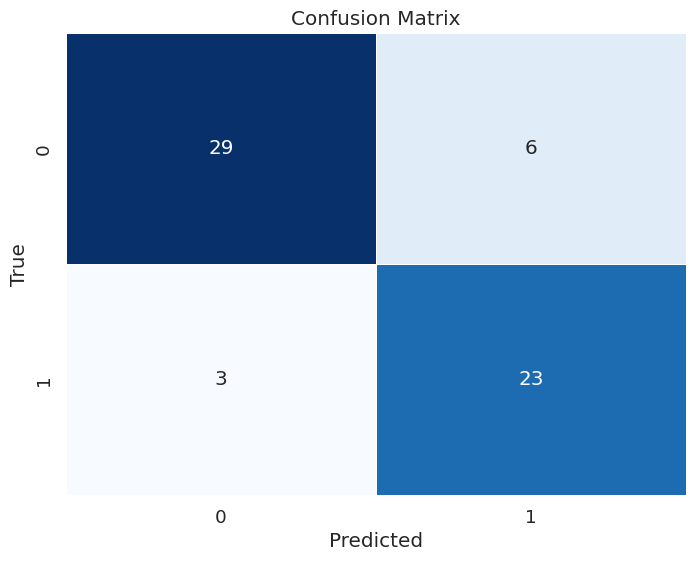

In [21]:
#Train LogisticRegressionCV

model = LogisticRegressionCV()
model.fit(X_train, y_train)

#Calculate metrics in tranning
y_test_pred = model.predict(X_test)

acc = accuracy_score(y_test_pred, y_test)
precision = precision_score(y_test_pred, y_test)
recall = recall_score(y_test_pred, y_test)
confusion = confusion_matrix(y_test_pred, y_test)

print(f"Accuracy score for Logistic Regression: {acc}")
print(f"Recall for Logistic Regression: {recall}")
print(f"Precision for Logistic Regression: {precision}")

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

results_df["model"].append("Linear Regression CV")
results_df["recall"].append(recall)
results_df["precision"].append(precision)
results_df["accuracy"].append(acc)

Comparamos con modelo no lineal: 

In [22]:
import xgboost as xgb

Accuracy score for XGBoost: 0.819672131147541
Recall for XGBoost: 0.8275862068965517
Precision for XGBoost: 0.8


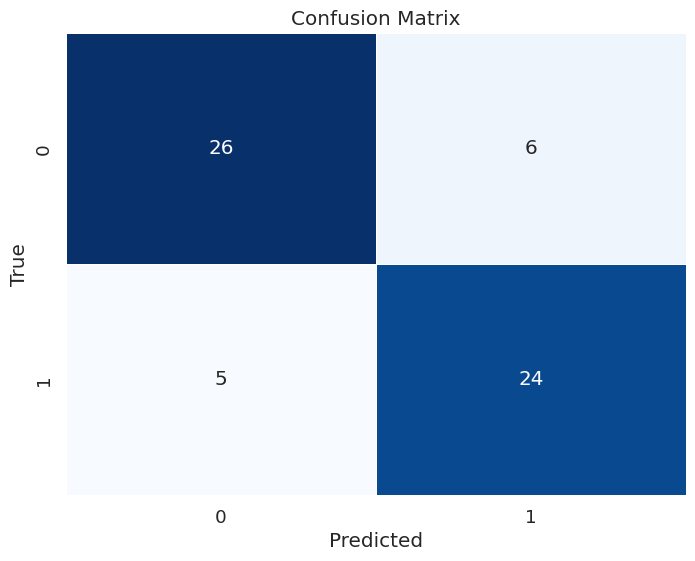

In [23]:

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy score for XGBoost: {acc}")
print(f"Recall for XGBoost: {recall}")
print(f"Precision for XGBoost: {precision}")

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


results_df["model"].append("XG Boost")
results_df["recall"].append(recall)
results_df["precision"].append(precision)
results_df["accuracy"].append(acc)

In [24]:
#Results summary 

df = pd.DataFrame(results_df)
df

,model,recall,precision,accuracy
0,Linear Regression,0.857143,0.827586,0.852459
1,Linear Regression CV,0.884615,0.793103,0.852459
2,XG Boost,0.827586,0.800000,0.819672


Conclusiones: 

Se observan resultados muy similares para todos los modelos, teniendo el mismo accuracy pero distintos valores de precision y recall. 

En este caso, al tratarse de un dataset para aplicacion médica, se le debe dar prioridad al valor de recall. Por ello se considera a Linear Regression CV como el mejor modelo obtenido. 